## The Python Numerical Stack

Consists of:

- numpy/scipy (vectors and computational mathematics)
- pandas (dataframes)
- matplotlib (plotting)
- seaborn (statistical plotting)
- scikit-learn (machine learning)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

**Note** We typically only import what we need from scikit-learn e.g.

In [2]:
from sklearn.linear_model import LinearRegression

#### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/



> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
          — [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [3]:
seeds_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt",
                      header=None, sep="\s+")
seeds_data.columns = [
"area",
"perimeter",
"compactness",
"length of kernel",
"width of kernel ",
"asymmetry coefficient ",
"length of kernel groove",
"Class"
]

In [4]:
seeds_data.shape

(210, 8)

#### What does `.shape` do?

### Dataframes

We will have loaded the breast cancer data into a dataframe for ease of manipulation.

In [5]:
seeds_data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1



### Pair Plot

We will use Searborn to prepare a **Pair Plot** of the Iris dataset. A Pair Plot is an array of scatter plots, one for each pair of features in the data. Rather than plotting a feature against itself, the diagonal is rendered as a **probability distribution** of the given feature.


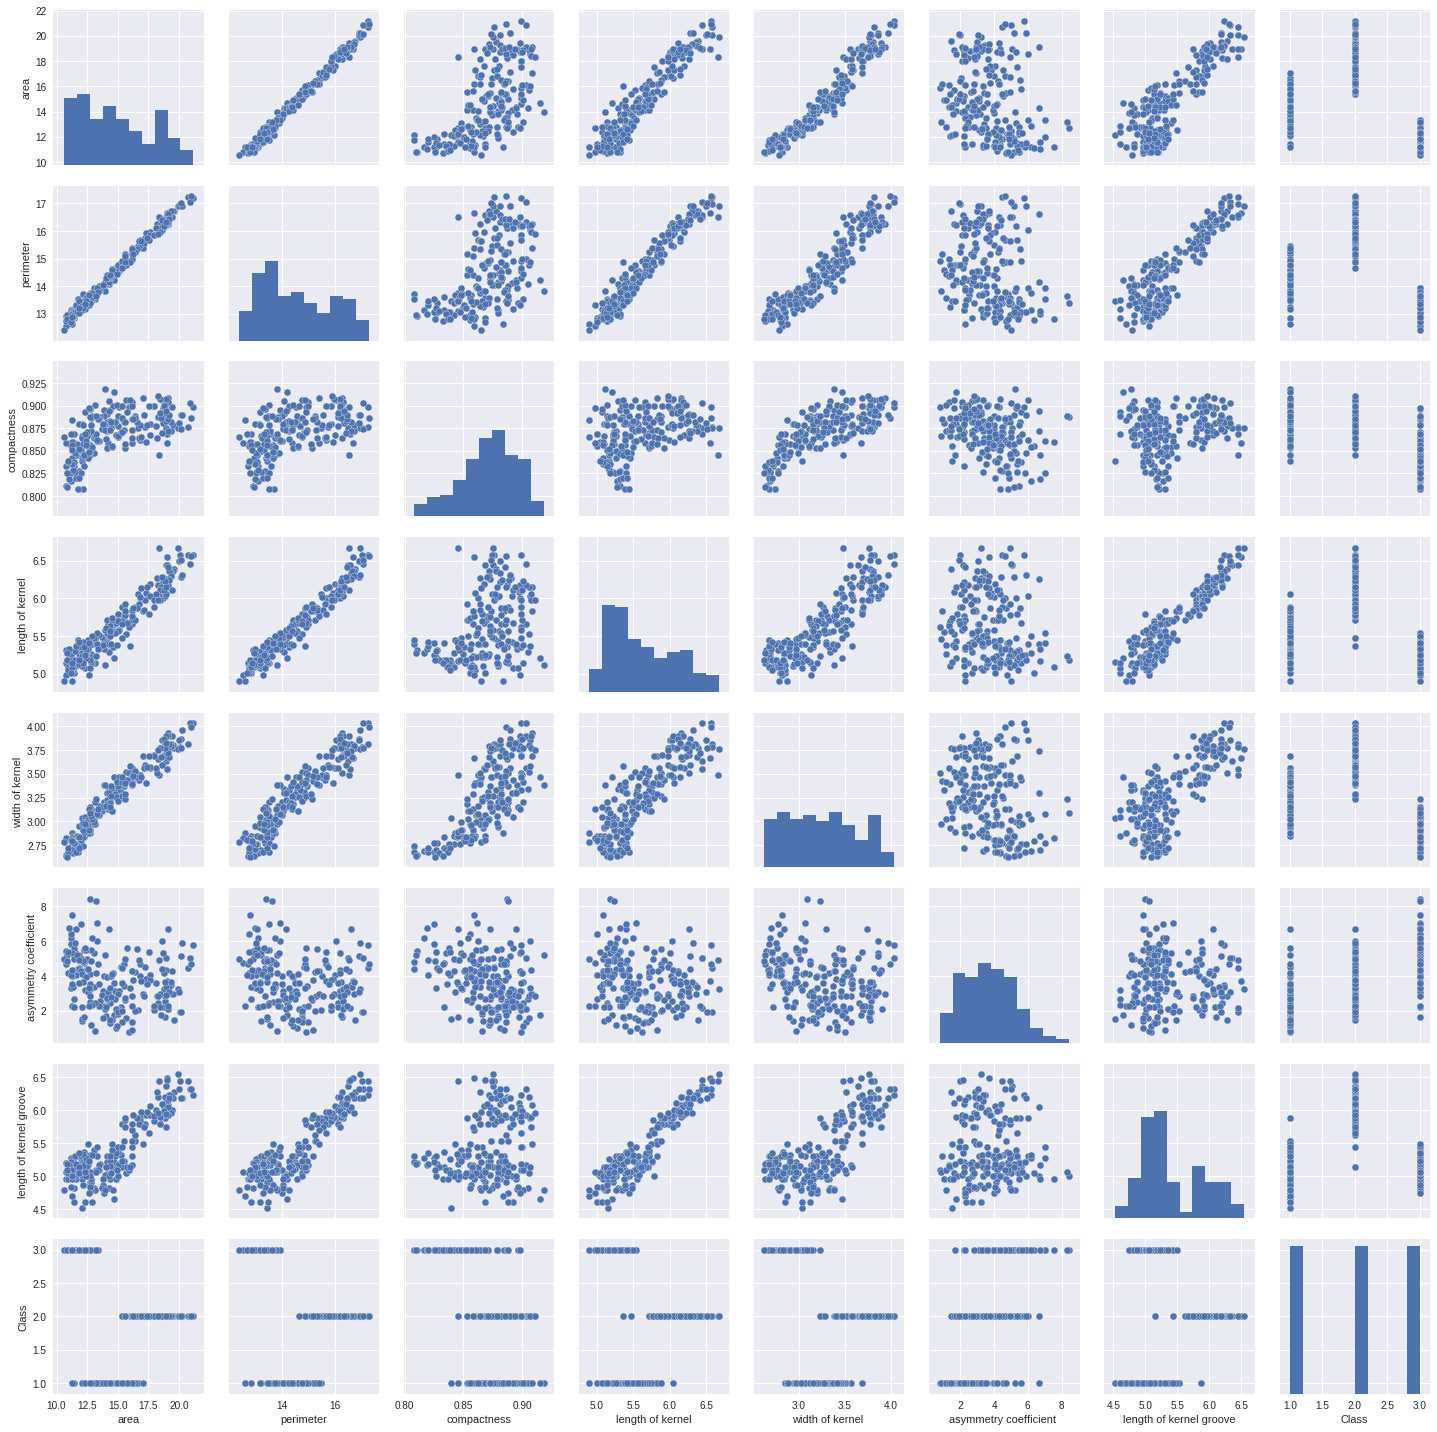

In [6]:
sns.pairplot(seeds_data)


### List Comprehension

We will use a **list comprehension** to remove the units and white space from the feature names to make them more "computer-friendly".


In general, list comprehensions have this form:

```python
lc = [do_something_to(var) for var in some_other_list]
```


In [7]:
def square_number(x):
    return x**2

In [8]:
[square_number(i) for i in (1,2,3,4,5)]

[1, 4, 9, 16, 25]

#### Write your own list comprehension

Write a function that uses a list comprehension to change this list

    [1,2,3,4,5]
    
into this list

    [2,3,4,5,6]

In [9]:
def incr_list_by_1(lst):
    """returns a list where each value in the list has been incremented by one"""
    
    ### BEGIN SOLUTION
    return [i+1 for i in lst]
    ### END SOLUTUON

In [10]:
assert incr_list_by_1([1,2,3,4,5]) == [2,3,4,5,6]

### BEGIN HIDDEN TESTS
assert incr_list_by_1([1,2,3,4,5,1,2,3,4,5]) == [2,3,4,5,6,2,3,4,5,6]
### END HIDDEN TESTS

### Remove Unit and White Space from Feature Name

Here we use a list comprehension to change the feature names:

In [11]:
seeds_data.columns

Index(['area', 'perimeter', 'compactness', 'length of kernel',
       'width of kernel ', 'asymmetry coefficient ', 'length of kernel groove',
       'Class'],
      dtype='object')

In [12]:
def remove_unit_and_white_space(feature_name):
    feature_name = feature_name.replace(' (cm)','')
    feature_name = feature_name.replace(' ', '_')
    return feature_name

In [13]:
seeds_data_features_names = [remove_unit_and_white_space(name) for name in seeds_data.columns]

In [14]:
seeds_data_features_names

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel_',
 'asymmetry_coefficient_',
 'length_of_kernel_groove',
 'Class']

In [15]:
seeds_data.columns = seeds_data_features_names
seeds_data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel_,asymmetry_coefficient_,length_of_kernel_groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Export to CSV

Ultimately, we will export a CSV of the dataframe to disk. This will make it easy to access the same data from both Python and R.


In [16]:
%ls

01-00-seeds.ipynb                       01-04-prediction.ipynb
01-00-seeds.rst                         data/
01-01-interactive-programming.ipynb     Untitled1.ipynb
01-02-Python.ipynb                      Untitled2.ipynb
01-03-the-python-numerical-stack.ipynb


In [17]:
%mkdir -p data

In [18]:
%ls

01-00-seeds.ipynb                       01-04-prediction.ipynb
01-00-seeds.rst                         data/
01-01-interactive-programming.ipynb     Untitled1.ipynb
01-02-Python.ipynb                      Untitled2.ipynb
01-03-the-python-numerical-stack.ipynb


In [19]:
seeds_data.to_csv('data/seeds_data.csv')